In [1]:
import numpy as np
import cv2
from krawtchouk_moments import krawtchouk_moments

In [2]:
import glob
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pandas as pd

In [3]:
# read data
N, M = 128, 128

data_dir = '/Users/kx/Docs/github/git_cccr_sl/chinese-calligraphy-recognition-sl/data/cccr/train'
images = np.zeros((len(glob.glob(data_dir + '/*/*/*.png')), N, M))
labels = np.zeros(len(images), dtype='int')
chars = [None] * len(glob.glob(data_dir + '/*/'))

i = 0
for label, folder in enumerate(glob.glob(data_dir + '/*/')):
    tmp = folder.split('/')
    char = tmp[-2]
    chars[label] = char
    for file in glob.glob(data_dir + '/{}/*/*.png'.format(char)):
        img = cv2.resize(cv2.imread(file), (M, N))[:, :, 0]
        images[i, :, :] = img
        labels[i] = label
        i += 1

In [4]:
N_order, M_order = 20, 20
p = [0.5, 0.5]
N, M = images[0].shape
km = np.zeros(images.shape)
for i in range(len(images)):
    km[i, :, :] = krawtchouk_moments(images[i], N, M, p)

km = km[:, :N_order, :M_order]
km = km.reshape((len(km), N_order * M_order))

In [5]:
def coord_to_idx(a, b):
    return M_order * a + b

def idx_to_coord(idx):
    return (idx // M_order, idx % N_order)

In [6]:
df = pd.DataFrame(km)
df.columns = [str(x) for x in df.columns]

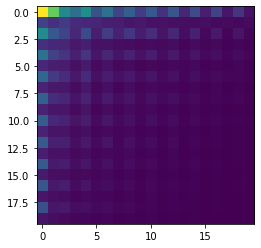

In [7]:
var = ((df.mean() - df.groupby(labels).mean()) ** 2).sum()
plt.imshow(np.array(var).reshape((N_order, M_order)))

In [8]:
# (-var).argsort()

## t-SNE Visualisation

In [11]:
from sklearn.manifold import TSNE

In [12]:
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
tsne_res = tsne.fit_transform(km[labels < 10])

In [13]:
pd.DataFrame(tsne_res)

,0,1
0,-6.045011,7.219044
1,2.938698,4.486887
2,-3.142230,4.493417
3,-5.984605,-7.343213
4,-6.752049,3.630937
...,...,...
555,-0.318539,-6.985193
556,5.239858,-5.918488
557,-0.287323,1.397825
558,6.008359,-6.803194


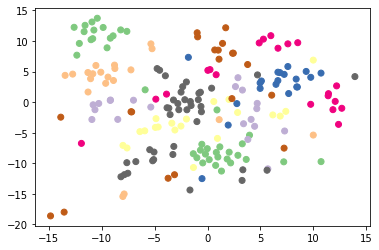

In [61]:
plt.scatter(tsne_res[:,0], tsne_res[:,1], c=labels[labels < 10], cmap='Accent')

In [41]:
i = 9
dists = ((km - km[i]) ** 2).sum(axis=1) // 1e7
[chars[label] for label in labels[dists.argsort()[1:]]]

['后',
 '后',
 '后',
 '后',
 '美',
 '后',
 '现',
 '得',
 '后',
 '美',
 '后',
 '己',
 '过',
 '己',
 '得',
 '来',
 '出',
 '美',
 '己',
 '是',
 '道',
 '美',
 '来',
 '天',
 '出',
 '最',
 '从',
 '得',
 '道',
 '己',
 '道',
 '第',
 '多',
 '天',
 '出',
 '后',
 '得',
 '美',
 '是',
 '最',
 '天',
 '后',
 '后',
 '生',
 '大',
 '成',
 '意',
 '道',
 '从',
 '用',
 '着',
 '道',
 '道',
 '出',
 '没',
 '出',
 '我',
 '这',
 '道',
 '起',
 '这',
 '这',
 '最',
 '把',
 '意',
 '发',
 '我',
 '得',
 '只',
 '得',
 '得',
 '道',
 '第',
 '样',
 '说',
 '道',
 '无',
 '就',
 '是',
 '在',
 '看',
 '己',
 '然',
 '最',
 '发',
 '发',
 '还',
 '道',
 '道',
 '行',
 '意',
 '最',
 '起',
 '是',
 '总',
 '天',
 '着',
 '己',
 '作',
 '后',
 '自',
 '过',
 '样',
 '起',
 '学',
 '美',
 '美',
 '天',
 '后',
 '是',
 '把',
 '生',
 '后',
 '意',
 '出',
 '后',
 '后',
 '后',
 '来',
 '美',
 '来',
 '天',
 '从',
 '后',
 '美',
 '后',
 '出',
 '来',
 '把',
 '美',
 '这',
 '为',
 '天',
 '己',
 '天',
 '得',
 '样',
 '己',
 '天',
 '样',
 '天',
 '来',
 '人',
 '又',
 '学',
 '来',
 '后',
 '现',
 '我',
 '发',
 '发',
 '面',
 '天',
 '是',
 '还',
 '天',
 '时',
 '在',
 '时',
 '不',
 '意',
 '说',
 '看',
 '不',
 '把',
 '看',
 '不'

0

In [18]:
df

,0,1,label
0,14.863332,-9.246108,0
1,0.691534,-6.673228,0
2,11.529746,-5.217728,0
3,-8.640193,4.777706,0
4,14.075011,-6.607341,0
...,...,...,...
555,-7.661013,-0.929143,9
556,2.868761,-12.101539,9
557,1.458284,1.235070,9
558,2.483570,-13.299688,9
